# **Laboratorio 6**
**Daniela Navas**

## **Task 1** - Teoría

**Responda las siguientes preguntas de forma clara y concisa, pueden subir un PDF o bien dentro del mismo Jupyter Notebook.**<br> 
**1. En un juego de suma cero para dos jugadores, ¿cómo funciona el algoritmo minimax para determinar la estrategia óptima para cada jugador? ¿Puede explicarnos el concepto de "valor minimax" y su importancia en este contexto?**<br>
Como bien sabemos, el algoritmo minimax es una técnica utilizada en teoría de juegos para encontrar la mejor estrategia en juegos de suma cero con información perfecta, como el ajedrez o el tres en raya. Se basa en la suposición de que ambos jugadores actúan de manera óptima, el jugador **MAX** busca maximizar su ganancia y el jugador **MIN** busca minimizar la ganancia de MAX.  

El **valor minimax** de un nodo en el árbol de juego es el mejor valor que un jugador puede garantizarse suponiendo que su oponente juega de manera óptima. Se calcula de manera recursiva; en los **nodos terminales**, se asigna el valor según la recompensa del juego, en los **nodos MAX**, se elige el máximo valor de los nodos hijos y en los **nodos MIN**, se elige el mínimo valor de los nodos hijos. Este valor es crucial porque indica el resultado esperado del juego si ambos jugadores juegan de manera óptima desde ese punto en adelante.  


**2. Compare y contraste el algoritmo minimax con la poda alfa-beta. ¿Cómo mejora la poda alfa-beta la eficiencia del algoritmo minimax, particularmente en árboles de caza grandes? Proporcione un ejemplo para ilustrar la diferencia en la complejidad computacional entre la poda minimax y alfa-beta.**<br>
El principal inconveniente del algoritmo minimax es su alto costo computacional. En un árbol de búsqueda con profundidad \( d \) y un factor de ramificación \( b \), su complejidad es: $ O(b^d) $

La **poda alfa-beta** es una optimización que reduce la cantidad de nodos evaluados sin afectar el resultado final del minimax. Esta técnica se basa en dos parámetros clave:

- **Alfa** ($\alpha$): Representa el mejor valor que el jugador MAX puede garantizarse en un camino determinado.  
- **Beta** ($\beta$):: Representa el mejor valor que el jugador MIN puede garantizarse en un camino determinado.  

El principio fundamental de esta poda es que si un nodo MIN encuentra un hijo con un valor inferior a \( \alpha \), no es necesario seguir explorando, ya que MAX nunca optará por ese camino. De manera similar, si un nodo MAX encuentra un hijo con un valor superior a \( \beta \), MIN descartará esa opción.

**Ejemplo**

**Sin** poda alfa-beta, un árbol con \( b = 3 \) y \( d = 4 \) evaluaría: $ 3^4 = 81 $ nodos. Pero **con** poda alfa-beta, el número de nodos evaluados podría reducirse aproximadamente a $ \approx 41 $ nodos dependiendo del orden de evaluación, logrando una mejora cercana a $ O(b^{d/2}) $


**3. ¿Cuál es el papel de expectiminimax en juegos con incertidumbre, como aquellos que involucran nodos de azar o información oculta? ¿En qué se diferencia el expectiminimax del minimax en el manejo de resultados probabilísticos y cuáles son los desafíos clave que aborda?**<br>
El **expectiminimax** es una extensión de minimax para juegos que incluyen elementos de azar, como los dados en backgammon o distribución de cartas en póker. Además de los nodos MAX y MIN, introduce **nodos de azar**, que representan eventos aleatorios con probabilidades conocidas.  

En minimax, los nodos MAX y MIN eligen el valor máximo o mínimo de sus hijos. Mientras que, en expectiminimax, los nodos de azar calculan el valor esperado ponderando los valores de los hijos por sus probabilidades de ocurrencia.  

Los desafios principales son la complejidad computacional ya que es aún mayor que minimax debido a la introducción de nodos de azar; y la dependencia de información probabilística precisa, lo cual puede ser difícil en juegos con incertidumbre oculta.  

---

## **Task 2** - Connect Four
Para este laboratorio deberán programar un agente que sea capaz de jugar Connect Four. Si no están familiarizados con el juego, pueden encontrar las reglas [aquí](https://regentsctr.uni.edu/connect-four). Para programar este agente, deberán usar el algoritmo de Minimax, 
y, la técnica de eficiencia de alpha-beta pruning. 

Para el tablero y validación de reglas, pueden usar código de alguna otra fuente (siempre citando), alguna librería (si encuentra, y citándola), generado por una herramienta de IA generativa (siempre citando con el prompt que usaron), o bien programada por ustedes mismos (kudos si lo hacen ustedes mismos). 

El agente que programará deberá usar el algoritmo de minimax para calcular sus movimientos, este deberá tener la opción de activar o desactivar la técnica de alpha-beta pruning. Con estos deberá dejar la opción de:
1. Jugador humano contra jugador IA (el que ustedes programan)
2. Jugador IA vs jugador IA (serían dos instancias de su agente creado con minimax)

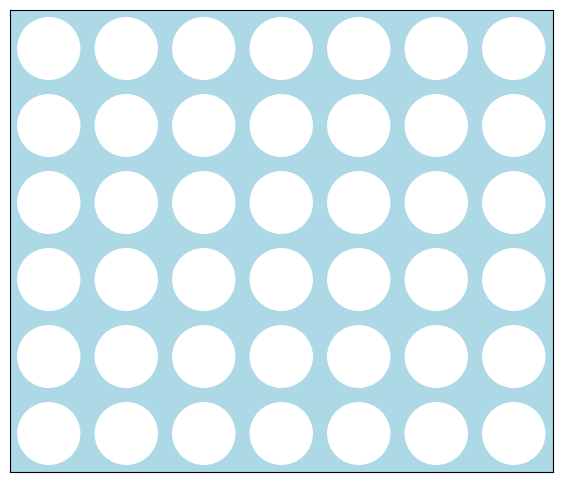

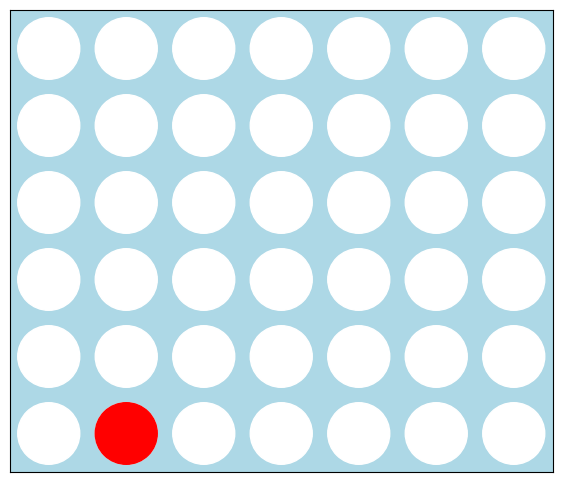

IA 2 juega en la columna 2


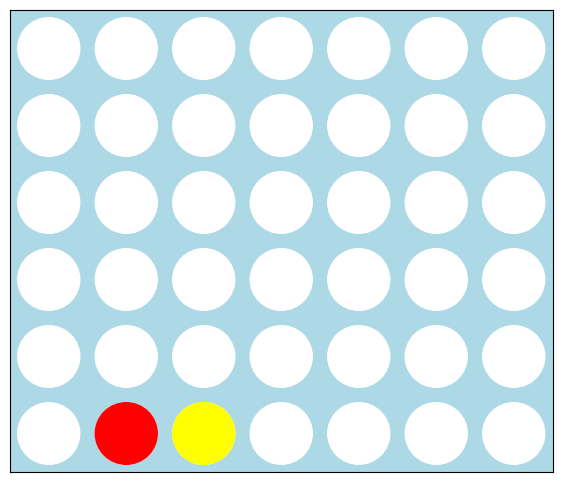

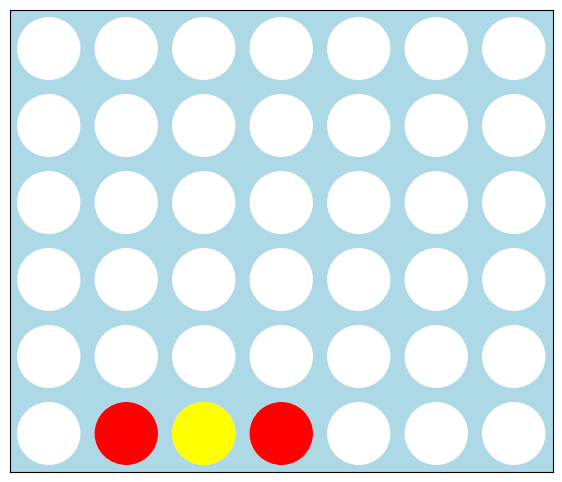

IA 2 juega en la columna 0


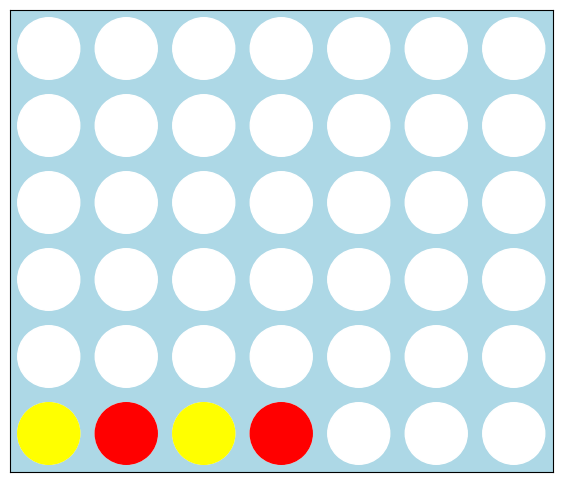

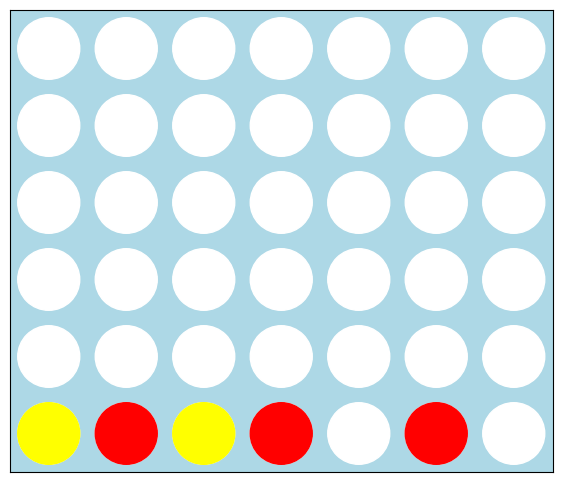

IA 2 juega en la columna 0


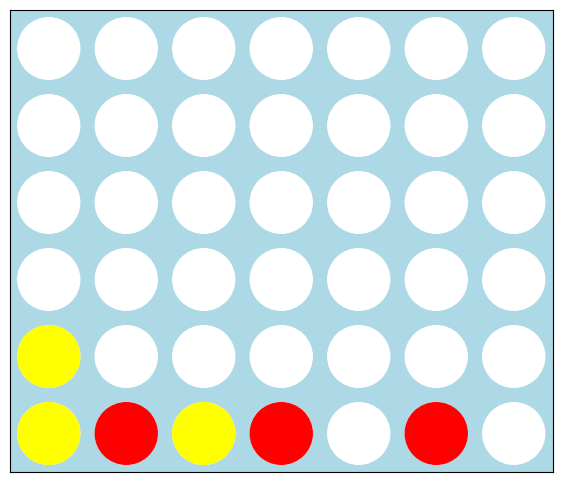

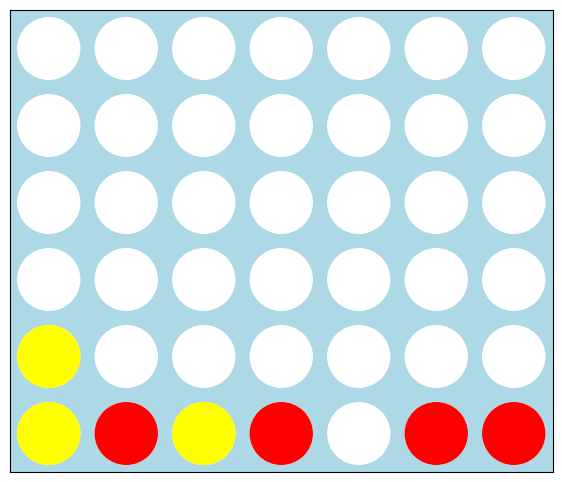

IA 2 juega en la columna 4


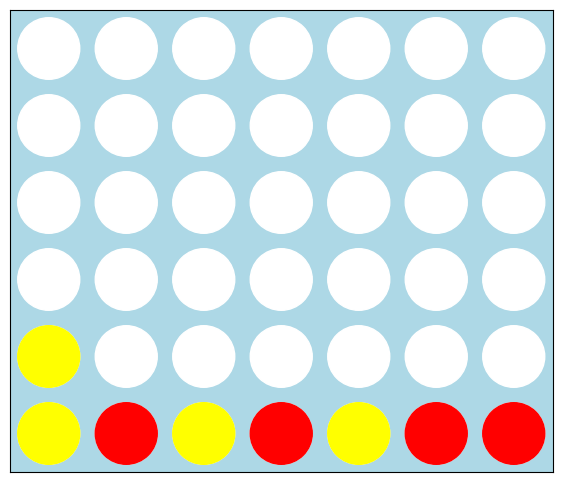

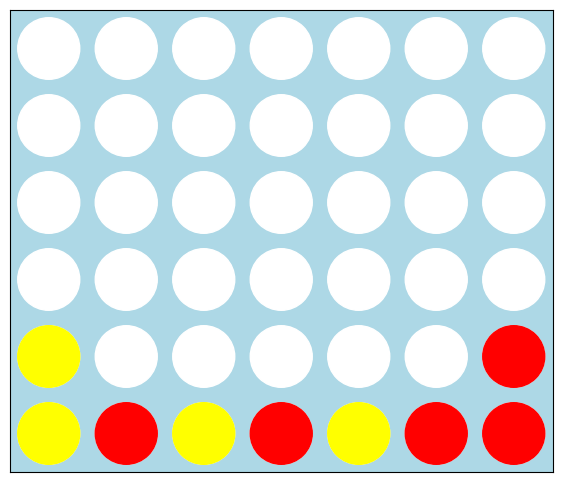

IA 2 juega en la columna 0


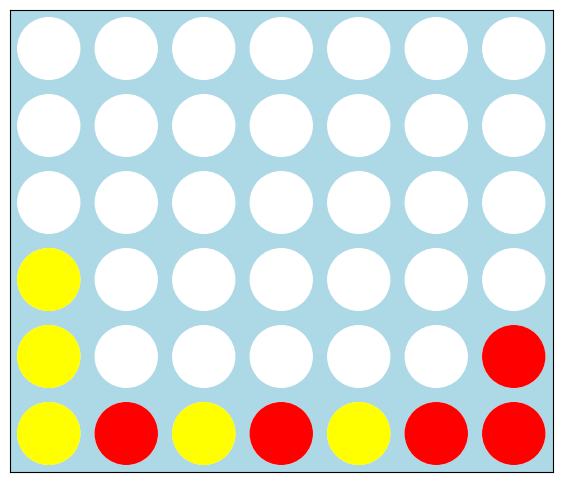

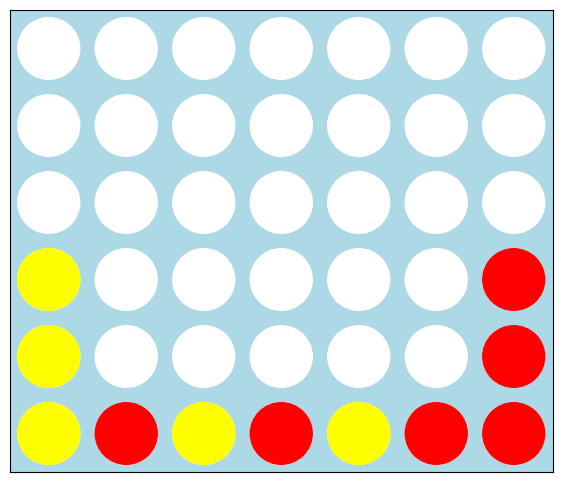

IA 2 juega en la columna 0


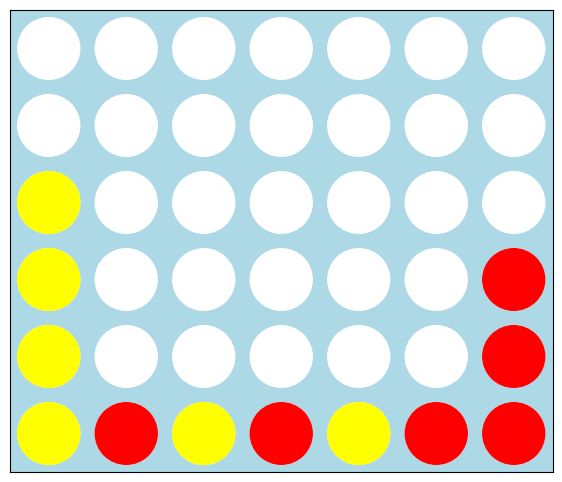

¡Jugador 2 gana!


In [ ]:
# LIBRERIAS
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import matplotlib.patches as patches # type: ignore
import random

# Definir variables para tamaño de tablero
ROWS = 6
COLS = 7

# ------------------------------------------------------------------------------
#
# Clase para juego Connect Four
#
# ------------------------------------------------------------------------------
class ConnectFour:
    def __init__(self):
        """
        Inicializa el tablero vacío de Connect Four con las dimensiones específicas
        y establece el turno del jugador.
        """
        self.board = np.zeros((ROWS, COLS), dtype=int) # Definir Matriz que representa el tablero

    def drop_piece(self, col, player):
        """
        Proceso para llenar el tablero siguiendo las reglas, es decir, las piezas se acomodan
        hasta abajo del talero, conforme "caen"

        - col: Número de columnas del tablero
        - player: El jugador actual (1 o 2)
        """
        for row in range(ROWS-1, -1, -1): # Recorre las filas de abajo hacia arriba (Así se llena el tablero)
            # Si la posición está vacía (0), coloca la ficha
            if self.board[row, col] == 0:
                self.board[row, col] = player  # Asigna la ficha del jugador (1 o 2)
                return row, col  # Devuelve la posición donde cayó la ficha
        return None  # Si la columna está llena, devuelve None 

    def is_valid_move(self, col):
        """
        Devuelve True si la columna no está llena, o sea si la primera fila sigue vacía

        - col: Número de columnas del tablero
        """
        return self.board[0, col] == 0  

    def get_valid_moves(self):
        """
        De vuelve una lista de columnas donde aún se pueden hacer movimientos
        """
        return [col for col in range(COLS) if self.is_valid_move(col)]

    def print_board(self):
        """
        Muestra el tablero de juego en formato gráfico utilizando la librería matplotlib.
        Cada celda está representada por un círculo blanco, y las fichas de los jugadores
        se muestran en rojo o amarillo.
        """       
        fig, ax = plt.subplots(figsize=(COLS, ROWS)) # Crear figura con un tamaño específico
        
        # Establecer los límites del gráfico 
        ax.set_xlim(0, COLS)  # Límite en el eje X (columnas)
        ax.set_ylim(0, ROWS)  # Límite en el eje Y (filas)
        ax.add_patch(patches.Rectangle((0, 0), COLS, ROWS, linewidth=2, facecolor='lightblue')) # Rectángulo de fondo del tablero con un color de fondo 
        
        # Recorre cada fila y columna del tablero
        for row in range(ROWS):
            for col in range(COLS):
                ax.add_patch(patches.Circle((col + 0.5, ROWS - row - 0.5), 0.4, color='white')) # Círculo blanco como fondo en cada celda del tablero
                if self.board[row, col] == 1: # Si la celda tiene un 1 se pone un circulo rojo 
                    ax.add_patch(patches.Circle((col + 0.5, ROWS - row - 0.5), 0.4, color='red'))
                elif self.board[row, col] == 2: # Si la celda tiene un 2 se pone un circulo amarillo
                    ax.add_patch(patches.Circle((col + 0.5, ROWS - row - 0.5), 0.4, color='yellow'))
        
        ax.set_xticks([])  # Elimina las marcas del eje X
        ax.set_yticks([])  # Elimina las marcas del eje Y
        plt.show() # Mostrar gráfico con el tablero en pantalla
    
    def check_winner(self, player):
        """
        Verifica si el jugador especificado (1 o 2) ha ganado en el juego. La función
        comprueba si hay cuatro fichas consecutivas del mismo jugador en una fila, columna o diagonal.

        - player: El jugador actual (1 o 2)
        """
        for row in range(ROWS): # Comprobar en las filas (horizontales)
            for col in range(COLS - 3):
                if all(self.board[row, col + i] == player for i in range(4)): # Verifica si hay 4 fichas consecutivas en la misma fila (horizontal)
                    return True  # Si encuentra una línea ganadora, retorna True
        
        for row in range(ROWS - 3):  # Comprobar en las columnas (verticales)
            for col in range(COLS):
                if all(self.board[row + i, col] == player for i in range(4)): # Verifica si hay 4 fichas consecutivas en la misma columna (vertical)
                    return True  # Si encuentra una línea ganadora, retorna True
        
        for row in range(ROWS - 3): # Comprobar en las diagonales descendentes (de arriba a izquierda)
            for col in range(COLS - 3):
                if all(self.board[row + i, col + i] == player for i in range(4)): # Verifica si hay 4 fichas consecutivas en la diagonal descendente
                    return True  # Si encuentra una línea ganadora, retorna True
        
        for row in range(3, ROWS): # Comprobar en las diagonales ascendentes (de abajo a izquierda)
            for col in range(COLS - 3):
                if all(self.board[row - i, col + i] == player for i in range(4)): # Verifica si hay 4 fichas consecutivas en la diagonal ascendente
                    return True  # Si encuentra una línea ganadora, retorna True
    
        return False  # Si no se encuentra ninguna línea ganadora, retorna False
    
    def is_draw(self):
        """
        Verifica si el juego ha terminado en empate. Un empate ocurre cuando todas las columnas
        están llenas (es decir, no hay espacios vacíos) y no hay un ganador.
        """
        return all(self.board[0, col] != 0 for col in range(COLS)) # Comprueba si todas las columnas tienen al menos una ficha (no están vacías)

    def evaluate_board(self, player):
        """
        Evalúa el tablero y asigna un valor numérico basado en el estado del juego.
        Si el jugador especificado ha ganado, devuelve 1000. Si el oponente ha ganado,
        devuelve -1000. Si no hay un ganador, devuelve 0.
        """
        opponent = 3 - player # Determina quién es el oponente del jugador (si el jugador es 1, el oponente es 2 y viceversa)
        
        if self.check_winner(player): # Si el jugador ha ganado, retorna un valor alto (1000) para indicar una victoria
            return 1000
        elif self.check_winner(opponent): # Si el oponente ha ganado, retorna un valor bajo (-1000) para indicar una derrota
            return -1000
        return 0 # Si no hay ganador, retorna 0 (tablero neutral o en progreso)

    def minimax(self, depth, alpha, beta, maximizing_player, player):
        """
        Implementa el algoritmo Minimax con poda alpha-beta para determinar la mejor jugada.
        El algoritmo evalúa el tablero hasta una cierta profundidad, alternando entre el jugador
        maximizante y el jugador minimizante, y usa la poda alpha-beta para optimizar el proceso.
        
        - depth: La profundidad de la búsqueda, es decir el número de niveles de jugadas a considerar.
        - alpha: El valor máximo garantizado que el jugador maximizado puede obtener.
        - beta: El valor mínimo garantizado que el jugador minimizado puede obtener.
        - maximizing_player: Si es True, estamos evaluando para el jugador que maximiza la puntuación.
        - player: El jugador actual (1 o 2)
        """
        opponent = 3 - player # Determina el oponente del jugador actual
        valid_moves = self.get_valid_moves() # Obtiene las jugadas válidas para el jugador actual
        
        # Si se alcanza la profundidad máxima o hay un ganador o empate, evaluamos el tablero
        if depth == 0 or self.check_winner(player) or self.check_winner(opponent) or self.is_draw():
            return self.evaluate_board(player)
        
        # Fase de maximizar la puntuación (el jugador que maximiza su puntaje)
        if maximizing_player:
            max_eval = float('-inf')  # Inicializa el valor máximo con un valor muy bajo
            for col in valid_moves:
                row, _ = self.drop_piece(col, player)  # Realiza la jugada del jugador
                eval_score = self.minimax(depth - 1, alpha, beta, False, player)  # Llama recursivamente para la siguiente jugada
                self.board[row, col] = 0  # Deshacer la jugada (vuelve atrás)
                max_eval = max(max_eval, eval_score)  # Actualiza el valor máximo encontrado
                alpha = max(alpha, eval_score)  # Actualiza el valor de alpha
                if beta <= alpha:  # Si el valor de beta es menor o igual que alpha, realiza la poda
                    break
            return max_eval  # Retorna el valor máximo encontrado para el jugador que maximiza
        
        # Fase de minimizar la puntuación (el jugador que minimiza su puntaje)
        else:
            min_eval = float('inf')  # Inicializa el valor mínimo con un valor muy alto
            for col in valid_moves:
                row, _ = self.drop_piece(col, opponent)  # Realiza la jugada del oponente
                eval_score = self.minimax(depth - 1, alpha, beta, True, player)  # Llama recursivamente para la siguiente jugada
                self.board[row, col] = 0  # Deshace la jugada (vuelve atrás)
                min_eval = min(min_eval, eval_score)  # Actualiza el valor mínimo encontrado
                beta = min(beta, eval_score)  # Actualiza el valor de beta
                if beta <= alpha:  # Si el valor de beta es menor o igual que alpha, realiza la poda
                    break
            return min_eval  # Retorna el valor mínimo encontrado para el jugador que minimiza
    
    def minimax_without_pruning(self, depth, maximizing_player, player):
        """
        Implementa el algoritmo Minimax sin poda alpha-beta para determinar la mejor jugada.
        El algoritmo evalúa el tablero hasta una cierta profundidad, alternando entre el jugador
        maximizante y el jugador minimizante, pero no utiliza la optimización de poda alpha-beta.
        
        - depth: La profundidad de la búsqueda (número de niveles de jugadas a considerar).
        - maximizing_player: Si es True, estamos evaluando para el jugador que maximiza la puntuación.
        - player: El jugador actual (1 o 2).
        """
        opponent = 3 - player # Determina el oponente del jugador actual
        valid_moves = self.get_valid_moves() # Obtiene las jugadas válidas para el jugador actual
        
        # Si se alcanza la profundidad máxima o hay un ganador o empate, evaluamos el tablero
        if depth == 0 or self.check_winner(player) or self.check_winner(opponent) or self.is_draw():
            return self.evaluate_board(player)
        
        # Fase de maximizar la puntuación (el jugador que maximiza su puntaje)
        if maximizing_player:
            max_eval = float('-inf')  # Inicializa el valor máximo con un valor muy bajo
            for col in valid_moves:
                row, _ = self.drop_piece(col, player)  # Realiza la jugada del jugador
                eval_score = self.minimax_without_pruning(depth - 1, False, player)  # Llama recursivamente para la siguiente jugada
                self.board[row, col] = 0  # Deshace la jugada (vuelve atrás)
                max_eval = max(max_eval, eval_score)  # Actualiza el valor máximo encontrado
            return max_eval  # Retorna el valor máximo encontrado para el jugador que maximiza
        
        # Fase de minimizar la puntuación (el jugador que minimiza su puntaje)
        else:
            min_eval = float('inf')  # Inicializa el valor mínimo con un valor muy alto
            for col in valid_moves:
                row, _ = self.drop_piece(col, opponent)  # Realiza la jugada del oponente
                eval_score = self.minimax_without_pruning(depth - 1, True, player)  # Llama recursivamente para la siguiente jugada
                self.board[row, col] = 0  # Deshace la jugada (vuelve atrás)
                min_eval = min(min_eval, eval_score)  # Actualiza el valor mínimo encontrado
            return min_eval  # Retorna el valor mínimo encontrado para el jugador que minimiza

    def get_best_move(self, depth, player, use_alpha_beta = True):
        """
        Determina la mejor jugada para el jugador actual utilizando el algoritmo Minimax,
        con o sin poda alpha-beta, según el parámetro `use_alpha_beta`.
        
        - depth: La profundidad de la búsqueda (número de niveles de jugadas a considerar).
        - player: El jugador actual (1 o 2).
        - use_alpha_beta: Un booleano que indica si se debe usar la poda alpha-beta (por defecto es True).
        """
        best_score = float('-inf')  # Inicializar la mejor puntuación con un valor muy bajo
        best_col = None  # Inicializar la columna de la mejor jugada como None
        
        # Recorre todas las jugadas válidas (columnas) para el jugador
        for col in self.get_valid_moves():
            # Realiza la jugada del jugador en la columna y obtiene la fila correspondiente
            row, _ = self.drop_piece(col, player)
            
            # Calcula la puntuación de la jugada utilizando Minimax:
            # Si use_alpha_beta es True usa Minimax con poda alpha-beta y si use_alpha_beta es False, usa Minimax sin poda alpha-beta.
            score = self.minimax(depth - 1, float('-inf'), float('inf'), False, player) if use_alpha_beta else self.minimax_without_pruning(depth - 1, False, player)
            
            self.board[row, col] = 0 # Deshacer la jugada (vuelve al estado anterior del tablero)
            if score > best_score: # Si la puntuación obtenida es mejor que la puntuación actual, actualiza la mejor puntuación y columna
                best_score = score
                best_col = col
        return best_col # Retorna la columna de la mejor jugada encontrada

    def play_game(self, human_vs_ai = True, ia1_with_pruning = True):
        """
        Controla el flujo del juego de Connect Four entre un humano y una IA, o entre dos IAs.
        El juego se ejecuta en un bucle donde cada jugador realiza una jugada, y el juego termina
        cuando hay un ganador o un empate.

        - human_vs_ai: Un booleano que indica si el juego es entre un humano y una IA (por defecto es True).
        - ia1_with_pruning: Un booleano que determina si la IA 1 usa poda alpha-beta (por defecto es True).
        """

        player = 1  # Empieza el jugador 1 (humano o IA)
        first_move = True  # Controla si es el primer movimiento de la IA

        while True:
            self.print_board()  # Muestra el tablero actual
            
            # Si es un juego humano vs. IA y es el turno del jugador 1 (humano)
            if human_vs_ai and player == 1:
                while True:  # Bucle para asegurar que el número ingresado sea válido
                    try:
                        col = int(input("Elige una columna (0-6): "))  # Solicita la columna
                        if col < 0 or col > 6:  # Verifica si el número está fuera del rango
                            print("Número fuera de rango. Elige un número entre 0 y 6.")
                        else:
                            break  # Sale del bucle si el número es válido
                    except ValueError:
                        print("Por favor, ingresa un número válido.")
            else: # Si no es un juego IA vs. IA
                if first_move: # Si es el primer movimiento de la IA, hace una jugada aleatoria
                    col = random.choice(self.get_valid_moves())  # Primer movimiento aleatorio de la IA
                    first_move = False  # Ya no es el primer movimiento
                else:
                    # Si es el turno de la IA, calcula la mejor jugada usando Minimax con Poda
                    col = self.get_best_move(4, player, use_alpha_beta = (player == 2))
                print(f"IA {player} juega en la columna {col}")
            
            # Verifica si la jugada es válida
            if self.is_valid_move(col):
                row, _ = self.drop_piece(col, player)  # Deja la ficha del jugador en la columna seleccionada
                
                if self.check_winner(player): # Verifica si el jugador actual ha ganado
                    self.print_board()  # Muestra el tablero final
                    print(f"¡Jugador {player} gana!")  # Anuncia al ganador
                    break  # Termina el juego
                elif self.is_draw(): # Verifica si ha ocurrido un empate
                    self.print_board()  # Muestra el tablero final
                    print("¡El juego termina en Empate! :)")  # Anuncia empate
                    break  # Termina el juego
                
                # Cambia al siguiente jugador (1 -> 2 o 2 -> 1)
                player = 3 - player
            else:
                # Si el movimiento no es válido, muestra un mensaje y permite otro intento
                print("Movimiento inválido. Intenta de nuevo.")

# Instanciar la clase para usar
game = ConnectFour()

# Para un juego de humano contra IA
game.play_game(human_vs_ai = True)

# Iniciar el juego entre IA sin poda (Jugador 1) e IA con poda (Jugador 2)
# game.play_game(human_vs_ai = False, ia1_with_pruning = False)

Al finalizar la programación, deberán grabar un video donde se muestre lo siguiente:
- Un juego de humano contra el agente IA. 
- Por lo menos 10 juegos de IA sin alpha-beta pruning contra IA con alpha-beta pruning. 


Para todos los juegos, asegúrense de acelerar lo suficiente para que el video no tome más de 10 minutos en total. 
En dicho video, también deberá mencionar (siempre dentro del marco de los 10 minutos de tiempo): 
- Qué hace su agente a nivel general 
- Explique por qué en el juego de IA vs IA, ganó el qué tenía o no la eficiencia de alpha-beta pruning. ¿Cómo afectó el tener o no esta estrategia al agente que ganó? 

---

**GITHUB:**
https://github.com/danielanavas2002/InteligenciaArtificial/tree/main/Laboratorio/Laboratorio06

**VIDEO DE FUNCIONAMIENTO:** https://youtu.be/hlbK9uqm5Js 